# <font color='orange'>DIP Exercise 09</font>

## RGB Images

The RGB image depicted below consists of 8 bands of the same width (from left to right: black, red, yellow, green, cyan, blue, magenta, white). All colors are at maximum intensity and maximum saturation. The image can be decomposed into three images of the same size, which represent one of the three color components each (R, G, B).

<img src='colorbars.png' width=200px height=50px style="float:center;"> <br><br>

<img src='exclamation_sign.png' width=20px height=20px style="float:left;"> Fill the following arrays with the three RGB components and validate your result by visually comparing the resulting image.


下面描绘的RGB图像由8个相同宽度的波段组成(从左到右:黑色、红色、黄色、绿色、青色、蓝色、品红、白色)。所有颜色都处于最大强度和最大饱和度。将图像分解为三张大小相同的图像，分别代表三种颜色分量(R, G, B)中的一种。

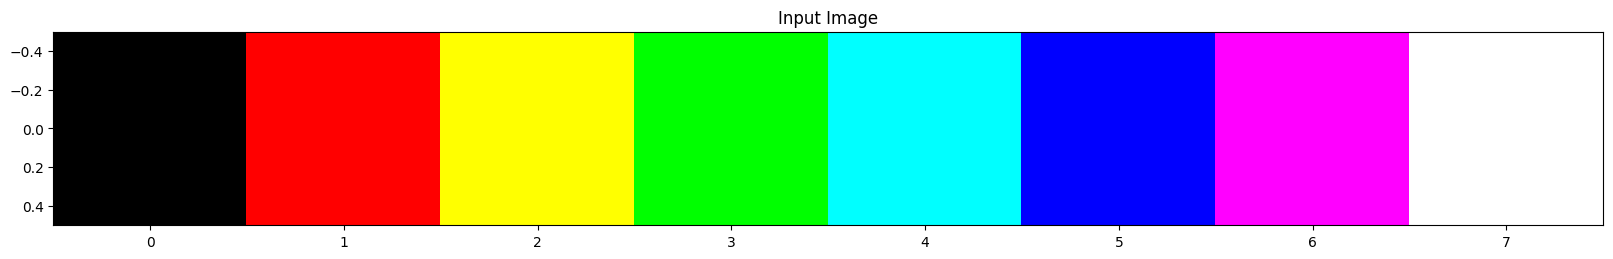

In [1]:
# Import required packages
import matplotlib.pyplot as plt
import numpy as np
import imageio.v3 as iio

# initialize the individual channels
red_channel = np.zeros((1,8), dtype=np.uint8)
green_channel = np.zeros((1,8), dtype=np.uint8)
blue_channel = np.zeros((1,8), dtype=np.uint8)

# TODO: Enter the respective RGB components to reproduce the color image depicted above!
red_channel[0, ...] = np.array  ([0, 255, 255,  0,   0,   0,  255, 255])
green_channel[0, ...] = np.array([0,  0,  255, 255, 255,  0,   0,  255])
blue_channel[0, ...] = np.array ([0,  0,   0,   0,  255, 255, 255, 255])

# concatenate the individual channels to an RGB image
rgb_image = np.zeros((1, 8, 3), dtype=np.uint8)
rgb_image[..., 0] = red_channel
rgb_image[..., 1] = green_channel
rgb_image[..., 2] = blue_channel

# create some axes for plotting
fig, ax = plt.subplots(1, 1, figsize=(20, 10))

# show the images
ax.set_title('Input Image')
ax.imshow(rgb_image);

<img src='exclamation_sign.png' width=20px height=20px style="float:left;"> Define a function to convert an RGB full-color image to a three-channel grayscale image!

定义一个函数将RGB全彩色图像转换为三通道灰度图像!

In [2]:
# function to convert an rgb input image to a grayscale image
def convert_rgb_to_gray(input_image):
        
    # convert input image to float for processing
    input_image_float = input_image.astype(float)

    # TODO: define the weights for the different color channels. 
    # Hint: Grayscale image corresponds to the luminance component of the image, as specified e.g. in ITU-R BT.601 (https://www.itu.int/rec/R-REC-BT.601-7-201103-I/en)
    w_r = 0.2990
    w_g = 0.5870
    w_b = 0.1140
    
    # TODO: compute luminance from the RGB input channels
    gray_scale = w_r * input_image_float[..., 0] + w_g * input_image_float[..., 1] + w_b * input_image_float[..., 2]
    # convert float intermediate image back to uint8 data type
    gray_scale = np.round(gray_scale).astype(np.uint8)

    # create the output image by replicating the luminance information for all channels
    output_image = np.zeros(input_image.shape, dtype=np.uint8)
    output_image[...,0] = gray_scale
    output_image[...,1] = gray_scale
    output_image[...,2] = gray_scale
    
    return output_image

The following code block will use the defined RGB to grayscale conversion `convert_rgb_to_gray` function and display the results applied on a test image. In addition to the grayscale version of the RGB image, displaying a single channel of the converted grayscale image can be interpreted as an indexed image with indices in the range $[0,255]$.

下面的代码块将使用定义的RGB到灰度的转换' convert_rgb_to_gray '函数，并显示应用在测试图像上的结果。除了RGB图像的灰度版本之外，显示转换后的灰度图像的单个通道可以被解释为索引范围为$[0,255]$的索引图像。

<img src='exclamation_sign.png' width=20px height=20px style="float:left;">Test different color maps for the indexed grayscale image. Possible values are, for instance, `viridis, plasma, inferno, magma, cividis`. There are also much more colormaps available in matplotlib as listed here: https://matplotlib.org/stable/tutorials/colors/colormaps.html .

为索引的灰度图像测试不同的颜色映射。例如，可能的值是“绿体，等离子体，地狱，岩浆，公民”。matplotlib中也有更多的颜色映射

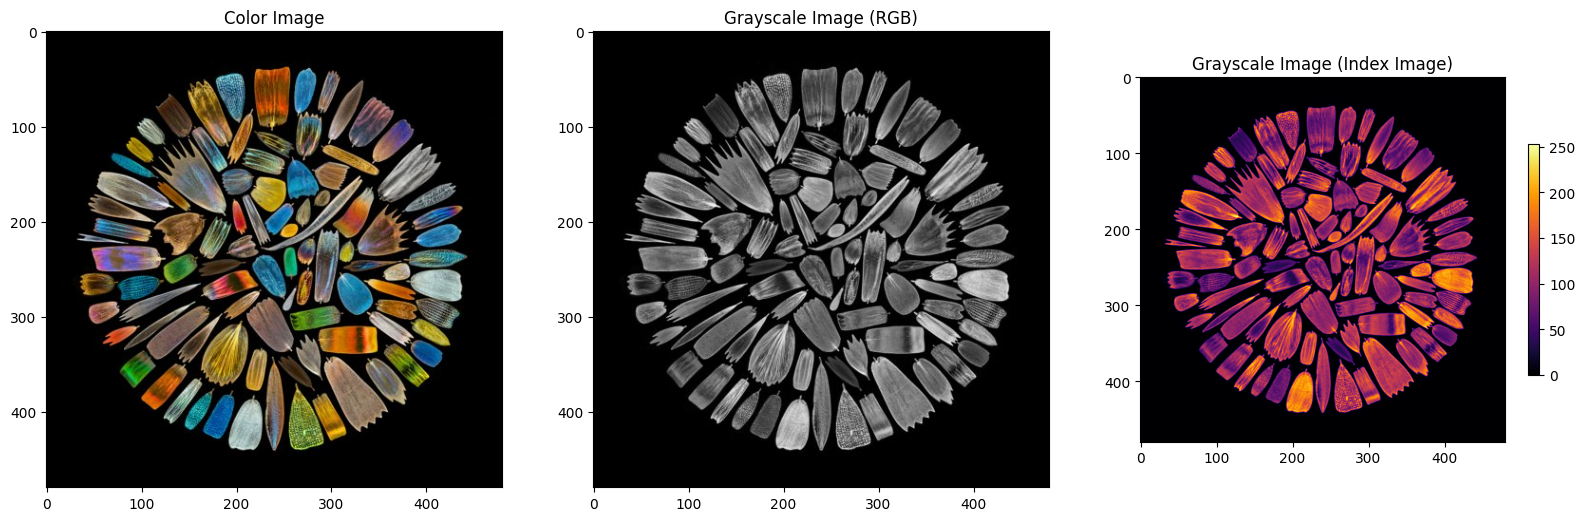

In [3]:
# load input image
# Image source: https://static5.olympus-lifescience.com/data/Image/Landing-Directory/ioty2020/dl/ioty2020_winner_asia.jpg?rev=B232
input_image = iio.imread('ioty2020_winner_asia.jpg')

# convert input image to grayscale
grayscale_image = convert_rgb_to_gray(input_image)

# create some axes for plotting
fig, ax = plt.subplots(1, 3, figsize=(20, 10))

# show the images
ax[0].set_title('Color Image')
ax[0].imshow(input_image)

ax[1].set_title('Grayscale Image (RGB)')
ax[1].imshow(grayscale_image)

 # TODO: Try different color maps here!
ax[2].set_title('Grayscale Image (Index Image)')
im = ax[2].imshow(grayscale_image[:,:,0], cmap='inferno')
fig.colorbar(im, ax=ax[2], orientation = 'vertical', shrink=0.3);

<img src='exclamation_sign.png' width=20px height=20px style="float:left;"> Define a function to desaturate an RGB image using your previously defined function to convert RGB images to grayscale!

使用之前定义的函数将RGB图像转换为灰度，定义一个函数来降低RGB图像的饱和度!

In [4]:
def desaturate_RGB_image(input_image, saturation_level=1.0):  #图像进行去饱和处理的部分：

    # convert input image to grayscale
    grayscale_image = convert_rgb_to_gray(input_image)
    
    # convert input image and grayscale image to float for processing
    grayscale_image_float = grayscale_image.astype(float)
    input_image_float = input_image.astype(float)

    # TODO: compute the desaturated image for the current saturation level
    desaturated_image = grayscale_image_float + saturation_level * (input_image_float - grayscale_image_float)
    
    # convert float image back to uint8
    desaturated_image = np.round(desaturated_image).astype(np.uint8)

    return desaturated_image

<img src='exclamation_sign.png' width=20px height=20px style="float:left;">Display results and play with the slider to analyze the behavior of different desaturation levels.

显示结果并使用滑块来分析不同去饱和水平的行为。

In [5]:
# Import required packages
import matplotlib.pyplot as plt
import numpy as np
import imageio.v3 as iio
from ipywidgets import interactive, fixed
import ipywidgets as widgets

# load input image
# Image source: https://static5.olympus-lifescience.com/data/Image/Landing-Directory/ioty2020/dl/ioty2020_winner_asia.jpg?rev=B232
input_image = iio.imread('ioty2020_winner_asia.jpg')

# interactive plotting of different saturation levels
def plot_desaturated_image(input_image, saturation_level):
    
    # compute the desaturated image version
    desaturated_image = desaturate_RGB_image(input_image, saturation_level)

    # Display the original and desaturated images side by side
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,5))
    ax1.imshow(input_image)
    ax1.set_title('Input Image')
    ax1.axis('off')
    ax2.imshow(desaturated_image)
    ax2.set_title('Saturation Level: {:.1f}'.format(saturation_level))
    ax2.axis('off')
    plt.show()

# range of saturation values are passed here (value indicates the starting position of the slider)
saturation_slider = widgets.FloatSlider(min=0, max=1.0, step=0.1, value=1.0)

# Creates the interactive widget and here it passes the image and the current saturation level
desaturation_widget = interactive(plot_desaturated_image, input_image=fixed(input_image), saturation_level=saturation_slider)
display(desaturation_widget)

interactive(children=(FloatSlider(value=1.0, description='saturation_level', max=1.0), Output()), _dom_classes…

## HSV Color Space

In contrast to the RGB color space, where changes of one component have an effect on all color properties, the HSV color space allows an intuitive selection of the color hue, saturation and brightness. 

在RGB色彩空间中，一个成分的变化会对所有颜色属性产生影响，与之相反，HSV色彩空间允许直观地选择色彩色调、饱和度和亮度。

<img src='exclamation_sign.png' width=20px height=20px style="float:left;">Execute the following code block and use the sliders to reproduce the reference colors either by a combination of R, G, B values (middle) or H, V, S values (right). Note that both the RGB and HSV values are normalized to a range of $[0,1]$ in this example.

执行以下代码块，并使用滑块通过R、G、B值(中间)或H、V、S值(右边)的组合来重现参考颜色。注意，在这个例子中，RGB和HSV值都被归一化为$[0,1]$的范围。

In [6]:
# Import required packages
import matplotlib.pyplot as plt
import numpy as np
import imageio.v3 as iio
from ipywidgets import interactive, fixed
import ipywidgets as widgets
from skimage.color import hsv2rgb

# read the reference image
input_image = iio.imread('ColorSquare.png')

# interactive plot function to display rgb and hsv images
def plot_rgb_vs_hsv(input_image, r, g, b, h, s, v):

    # define the rgb and the hsv image
    rgb_image = np.zeros((1,1,3), dtype=float)
    hsv_image = np.zeros((1,1,3), dtype=float)

    # copy slider values to the rgb image
    rgb_image[..., 0] = r
    rgb_image[..., 1] = g
    rgb_image[..., 2] = b

    # copy slider values to the hsv image
    hsv_image[..., 0] = h
    hsv_image[..., 1] = s
    hsv_image[..., 2] = v

    # Display the reference image
    fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(10,5))
    ax1.imshow(input_image)
    ax1.set_title('Reference Image')
    ax1.axis('off')

    # Display the rgb image
    ax2.imshow(rgb_image)
    ax2.set_title('RGB Value: %.2f, %.2f, %.2f' % (r, g, b))
    ax2.axis('off')

    # Convert hsv image to rgb and display it
    ax3.imshow(hsv2rgb(hsv_image))
    ax3.set_title('HSV Value: %.2f, %.2f, %.2f' % (h, s, v))
    ax3.axis('off')
    plt.show()

# setup sliders for the RGB and HSV values
r_slider = widgets.FloatSlider(min=0, max=1.0, step=0.01, value=1.0)
g_slider = widgets.FloatSlider(min=0, max=1.0, step=0.01, value=1.0)
b_slider = widgets.FloatSlider(min=0, max=1.0, step=0.01, value=1.0)

h_slider = widgets.FloatSlider(min=0, max=1.0, step=0.01, value=1.0)
s_slider = widgets.FloatSlider(min=0, max=1.0, step=0.01, value=1.0)
v_slider = widgets.FloatSlider(min=0, max=1.0, step=0.01, value=1.0)

# Creates the interactive widget and here it passes the image and the current saturation level
color_space_widget = interactive(plot_rgb_vs_hsv, input_image=fixed(input_image), r=r_slider, g=g_slider, b=b_slider, h=h_slider, s=s_slider, v=v_slider)
display(color_space_widget)

interactive(children=(FloatSlider(value=1.0, description='r', max=1.0, step=0.01), FloatSlider(value=1.0, desc…

## CIE XYZ Color Space   

On the image below, the CIE chromaticity diagram of the CIE xyY color space is shown, including the so-called Planckian locus of the black body temperature curve (printed in black).

下图显示了CIE xyY色彩空间的CIE色度图，其中包括黑体温度曲线的所谓普朗克轨迹(以黑色打印)。

X、Y和Z，分别代表颜色的亮度（或亮度感知）、颜色的色度（或色彩感知）以及颜色的深度（或暗度感知）。
<img src='exclamation_sign.png' width=20px height=20px style="float:left;">Determine the percentage of the X, Y, Z components in order to compose light at the location of a color  temperature of 3500 K.

确定X, Y, Z分量的百分比，以便在色温为3500k的位置组成光。

<img src="CIEChromaticity.png" width=50%>

<img src='question_sign.png' width=20px height=20px style="float:left;"> Answer the following questions with respect to the CIE chromaticity diagram:请回答以下有关CIE色度图的问题:
- Where is the spectral (monochromatic) locus?   380 - 700这个弧线
- Can the line of the purples be expressed by a spectral color?  最下面 底线
- How to construct the colors on a linear slope?   一条竖线
- How to construct the colors within a predefined triangle?   选红绿蓝三点，连接三角
- Specify the term *gamut*.

-光谱(单色)轨迹在哪里?   
-紫色的线条可以用光谱的颜色来表示吗?
-如何在线性斜坡上构建颜色?
-如何在预定义的三角形内构建颜色?
—指定术语“色域”。

## Generative Adversarial Networks   生成对抗网络

We already saw several CNN-based approaches where both the inputs and the outputs are images. For instance, the U-Net (with slight modifications) architecture can be used for image denoising, semantic segmentation and image registration. A mapping from a detailed image representation (raw image) to coarse labels is comparatively easy. The opposite direction, i.e., mapping from coarse labels to detailed realistic structures is much more complex and generally an ill-posed reverse problem as an infintely large amount of images could have produced the same semantic segmentation.

The adversarial training principle used for GANs can be used to train models which explicitly learn to generate realistically looking images from sketches, random noise or other conditional input. The generator is set to a regular encoder/decoder network like a U-Net and the discriminator is trained to distinguish between real and fake {image,label} pairs. One of the first instances of such image-to-image translation models was the Pix2Pix model as sketched below:

我们已经看到了几种基于cnn的方法，其中输入和输出都是图像。例如，U-Net(稍加修改)架构可用于图像去噪、语义分割和图像配准。从详细图像表示(原始图像)到粗糙标签的映射相对容易。相反的方向，即从粗糙标签到详细的现实结构的映射要复杂得多，并且通常是一个病态的反向问题，因为无限大数量的图像可以产生相同的语义分割。

用于gan的对抗训练原理可用于训练明确学习从草图，随机噪声或其他条件输入生成逼真图像的模型。生成器被设置为像U-Net一样的常规编码器/解码器网络，鉴别器被训练来区分真实和虚假的{image,label}对。这种图像到图像转换模型的第一个实例是如下所示的Pix2Pix模型:

<img src='pix2pix.png' width="50%"> 

<span style="color:gray">Image: Isola *et al.*, Image-to-Image Translation with Conditional Adversarial Networks, *CVPR*, 2017</span>

<img src='exclamation_sign.png' width=20px height=20px style="float:left;"> As it's generally quite time-consuming to properly train a GAN, we just refer to some online resources here. To play around with different example domains, you can check out [https://affinelayer.com/pixsrv/](https://affinelayer.com/pixsrv/).

由于正确训练GAN通常非常耗时，我们在这里只参考一些在线资源。要使用不同的示例域，您可以查看[https://affinelayer.com/pixsrv/](https://affinelayer.com/pixsrv/)

In the case of Pix2Pix, the training process relies on paired training data, *i.e.* pairs of real images and the associated sketches, segmentations or other label images. For some image translation tasks, there is actually no training data readily available or at least extremely hard to get. To this end Zhu *et al.* proposed the CycleGAN approach to translate images between two domains, without the need of data pairs.

在Pix2Pix的情况下，训练过程依赖于成对的训练数据，即。*对真实图像和相关的草图，分割或其他标签图像。对于一些图像翻译任务，实际上没有现成的训练数据，或者至少很难获得。为此，Zhu *等人*提出了CycleGAN方法，在不需要数据对的情况下在两个域之间进行图像翻译。

Answer the following questions with respect to the CycleGAN:

请回答以下有关CycleGAN的问题:


<img src='question_sign.png' width=20px height=20px style="float:left;"> How many networks are trained in a CycleGAN?

Answer: 4 networks need to be trained; 2 Generators, 2 Discriminators)

答:4个网络需要训练;2个产生器，2个鉴别器)

<img src='question_sign.png' width=20px height=20px style="float:left;"> Sketch the general framework of the CycleGAN.

勾勒出CycleGAN的总体框架

<img src='question_sign.png' width=20px height=20px style="float:left;"> The full training objective of a CycleGAN combines three loss terms. Name each of these terms, describe their working principle and state which model is used for computation.

CycleGAN的完整训练目标包括三个损失项。说出这些术语的名称，描述它们的工作原理和使用哪个模型进行计算的状态。

Adversarial Loss for generator G' that translates from X -> Y and discriminator Dy. Networks G and Dy are used to compute this loss.从X到Y转换的生成器G'和鉴别器Dy的对抗损失。网络g 和Dy用于计算这种损失。

Adversarial Loss for generator F that translates from Y -> X and discriminator Dx. Networks F and Dx are used to compute this loss.

Cycle Consistency Loss that ensures that F(G(a))   and G(F(y))  y. Only generators areused to compute this loss.

周期一致性损失，确保F(G(a))和G(F(y)) y。仅使用生成器来计算该损失。

<img src='exclamation_sign.png' width=20px height=20px style="float:left;"> Live demos to play with state-of-the-art generative models can be found at [https://www.nvidia.com/en-us/research/ai-playground/](https://www.nvidia.com/en-us/research/ai-playground/).